In [2]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import copy

In [4]:
sns.set_theme()

In [5]:
def plot_data(x):
    X = np.array(copy.deepcopy(x))
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()
    
def plot_clusters(x, clusters):
    X = np.array(copy.deepcopy(x))
    df = pd.DataFrame(X, columns=['x', 'y'])
    df['cluster'] = clusters
    sns.scatterplot(data=df, x='x', y='y', hue='cluster')
    plt.show()

#### Data sample


In [6]:
x = [[1, 1], [1, 0], [0, 1], [0, 0], [0.5, 0.5], [0.5, 0.6], 
     [0.6, 0.5], [0.6, 0.6], [10, 10], [11, 11], [10.5, 10.5], 
     [15, 12], [15, 15], [15, 13], [20, 20], [0, 15]]

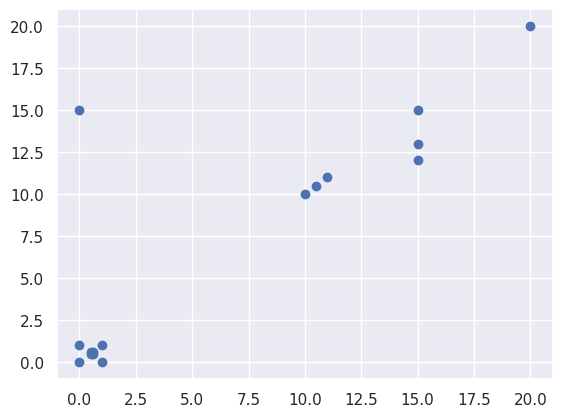

In [7]:
plot_data(x)

#### DBSCAN IMPLEMENTATION

In [8]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        
    def cal_euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def get_neighbours(self, point):
        neightbours = []
        for i in range(len(self.data)):
            if self.cal_euclidean_distance(self.data[i], point) <= self.eps:
                neightbours.append(i)
        return neightbours

    def assign_label(self, current_cluster, core_point, neighbours):
        self.visited[core_point] = 1
        self.labels[core_point] = current_cluster
        for neighbour_id in neighbours:
            if neighbour_id == core_point or self.visited[neighbour_id] == 1:
                continue
            if neighbour_id in self.core_points:
                self.assign_label(current_cluster, neighbour_id, self.neighbours[neighbour_id])
            elif self.labels[neighbour_id] == -1:
                self.labels[neighbour_id] = current_cluster
                self.visited[neighbour_id] = 1
        
    def fit(self, data):
        self.data = np.array(copy.deepcopy(data))
        self.neighbours = [self.get_neighbours(point) for point in self.data]
        self.core_points = [point_id for point_id, neighbours in enumerate(self.neighbours) if len(neighbours) >= self.min_samples]
        self.current_cluster = 0
        self.labels = [-1] * len(self.data)
        self.visited = [0] * len(self.data)
        
        if len(self.core_points) == 0:
            return np.array(self.labels)
        
        for core_point in self.core_points:
            if self.visited[core_point] == 1:
                continue
            self.assign_label(self.current_cluster, core_point, self.neighbours[core_point])
            self.current_cluster += 1
            
        return np.array(self.labels)

##### TEST WITH MY DBSCAN

In [9]:
dbscan = DBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit(x)

In [10]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2, -1, -1])

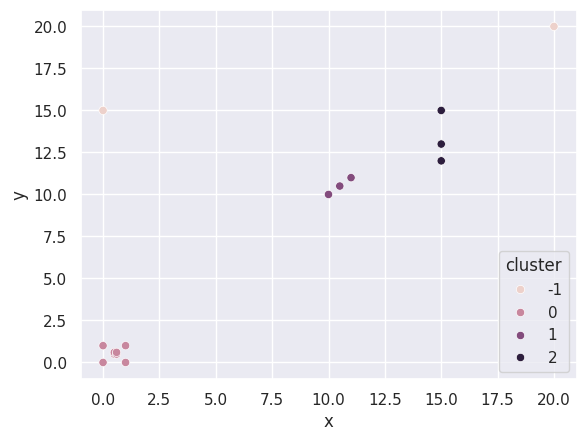

In [11]:
plot_clusters(x, clusters)

##### TEST WITH SKLEARN

In [12]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.cluster import DBSCAN as skDBSCAN

dbscan = skDBSCAN(eps=2, min_samples=3)
clusters = dbscan.fit_predict(x)

In [14]:
clusters


array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2, -1, -1])

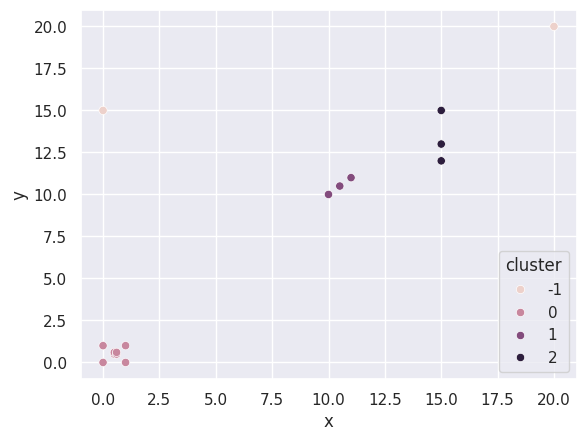

In [15]:
plot_clusters(x, clusters)

#### Random Sample

In [16]:
from sklearn.datasets import make_blobs

In [17]:
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=12)

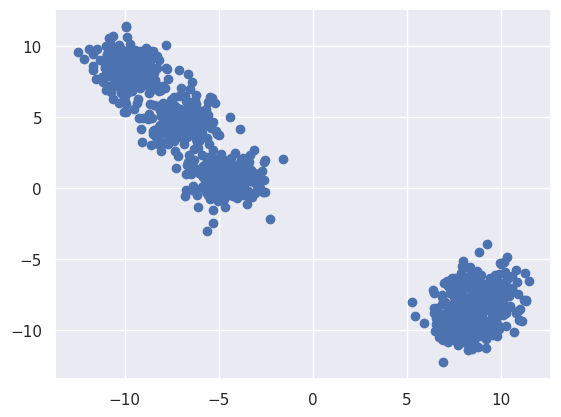

In [18]:
plot_data(X)

##### My DBSCAN

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit(X)

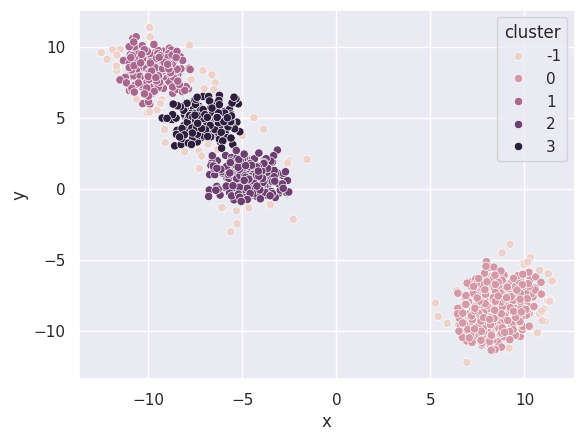

In [20]:
plot_clusters(X, dbscan_labels)

##### SKLEARN

In [21]:
# Using sklearn
dbscan = skDBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

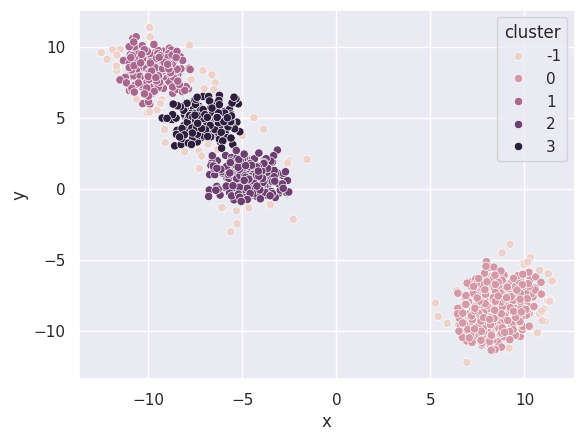

In [22]:
plot_clusters(X, labels)

##### Test
I will generate around 10000 datasets and compare result from my dbscan and result from sklearn's dbscan. 

In [23]:
from tqdm import tqdm
import time

In [24]:
bar = tqdm(range(10000))
equal = 0
my_dbscan_time_total = 0
sklearn_time_total = 0

for iter in bar:
    X, y = make_blobs(n_samples=100, centers=5, n_features=10, random_state=iter)
    my_dbscan = DBSCAN(eps=0.5, min_samples=5)
    my_dbscan_time = time.time()
    my_dbscan_labels = my_dbscan.fit(X)
    my_dbscan_time_total += time.time() - my_dbscan_time
    sklearn_time = time.time()
    sk_dbscan = skDBSCAN(eps=0.5, min_samples=5)
    sk_labels = sk_dbscan.fit_predict(X)
    sklearn_time_total += time.time() - sklearn_time
    if np.array_equal(my_dbscan_labels, sk_labels):
        equal += 1
    bar.set_description(f'Equal: {equal}, Not Equal: {iter - equal + 1}, MyDBSCAN: {my_dbscan_time_total:.2f}s, SklearnDBSCAN: {sklearn_time_total:.2f}s')

Equal: 10000, Not Equal: 0, MyDBSCAN: 415.87s, SklearnDBSCAN: 15.10s: 100%|██████████| 10000/10000 [07:33<00:00, 22.04it/s]
